In [1]:
import os
import sys
import numpy as np
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm

from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#--Reading
df = pd.read_csv('../data/M2_train_split.csv', index_col=0)

3#--Trasforming
cutoff = 1
df = df > cutoff
df_neg = df < -cutoff

df = pd.merge(df, df_neg, left_index=True, right_index=True)

uneffective = df.index.values[np.array(df.sum(1) == 0)]
df = df.iloc[np.array(df.sum(1) > 0)]

print('# uneffective: %i'%len(uneffective))
print('# effective: %i'%len(df))

# uneffective: 0
# effective: 1047


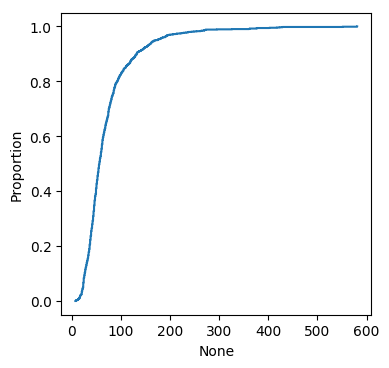

In [34]:
plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(df.sum(1))

In [13]:

#--Getting similarities
jc_similarities = 1- pdist(df, 'jaccard')
df2 = pd.DataFrame(squareform(jc_similarities), index= df.index.values, columns=df.index.values)


In [36]:
df2

,MTKNGOHFNXIVOS-UHFFFAOYSA-N,WHBIGIKBNXZKFE-UHFFFAOYSA-N,OYFJQPXVCSSHAI-BMSLDGIRSA-N,YWKRLOSRDGPEJR-KIUKIJHYSA-N,GKEGFOKQMZHVOW-UHFFFAOYSA-M,BBAZDLONIUABKI-UHFFFAOYSA-N,YPDVTKJXVHYWFY-UHFFFAOYSA-N,XJGFWWJLMVZSIG-UHFFFAOYSA-N,VPSRQEHTHIMDQM-FKLPMGAJSA-N,QUQPHWDTPGMPEX-QJBIFVCTSA-N,...,ANOMHKZSQFYSBR-UHFFFAOYSA-N,WAOQONBSWFLFPE-SECBINFHSA-N,KVWNWTZZBKCOPM-UHFFFAOYSA-M,GUGOEEXESWIERI-UHFFFAOYSA-N,QTFFGPOXNNGTGZ-RCSCTSIBSA-N,HCRKCZRJWPKOAR-JTQLQIEISA-N,MVWVFYHBGMAFLY-UHFFFAOYSA-N,FEBLZLNTKCEFIT-VSXGLTOVSA-N,OMCOKCNIYWULQH-UHFFFAOYSA-N,RRJFVPUCXDGFJB-UHFFFAOYSA-N
MTKNGOHFNXIVOS-UHFFFAOYSA-N,0.000000,0.016129,0.010753,0.053763,0.010753,0.036585,0.042254,0.034483,0.020833,0.022989,...,0.057971,0.019802,0.000000,0.014925,0.021277,0.021978,0.016393,0.007299,0.019231,0.000000
WHBIGIKBNXZKFE-UHFFFAOYSA-N,0.016129,0.000000,0.073394,0.043103,0.026316,0.038462,0.043011,0.018018,0.049383,0.037037,...,0.021277,0.058824,0.000000,0.000000,0.034783,0.029557,0.000000,0.032051,0.057377,0.029412
OYFJQPXVCSSHAI-BMSLDGIRSA-N,0.010753,0.073394,0.000000,0.055556,0.034965,0.053030,0.015873,0.043478,0.092391,0.051471,...,0.123894,0.082759,0.055556,0.033898,0.013514,0.030043,0.054545,0.078652,0.059603,0.007407
YWKRLOSRDGPEJR-KIUKIJHYSA-N,0.053763,0.043103,0.055556,0.000000,0.034014,0.153226,0.007634,0.020690,0.056701,0.042553,...,0.100840,0.066225,0.044248,0.076923,0.026667,0.070175,0.008403,0.015544,0.100671,0.037037
GKEGFOKQMZHVOW-UHFFFAOYSA-M,0.010753,0.026316,0.034965,0.034014,0.000000,0.029630,0.040650,0.035971,0.104396,0.091603,...,0.007937,0.032895,0.027027,0.042735,0.034483,0.090909,0.026549,0.037838,0.032258,0.054264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCRKCZRJWPKOAR-JTQLQIEISA-N,0.021978,0.029557,0.030043,0.070175,0.090909,0.054795,0.083744,0.082569,0.085185,0.053812,...,0.013889,0.055085,0.035176,0.038835,0.100000,0.000000,0.061224,0.079848,0.063291,0.101449
MVWVFYHBGMAFLY-UHFFFAOYSA-N,0.016393,0.000000,0.054545,0.008403,0.026549,0.049020,0.032258,0.018182,0.056250,0.027778,...,0.055556,0.050420,0.025000,0.011236,0.017241,0.061224,0.000000,0.000000,0.049180,0.019608
FEBLZLNTKCEFIT-VSXGLTOVSA-N,0.007299,0.032051,0.078652,0.015544,0.037838,0.022346,0.055215,0.032967,0.084071,0.062500,...,0.023952,0.020305,0.025974,0.024691,0.048649,0.079848,0.000000,0.000000,0.020000,0.046512
OMCOKCNIYWULQH-UHFFFAOYSA-N,0.019231,0.057377,0.059603,0.100671,0.032258,0.135338,0.068702,0.033113,0.065000,0.033333,...,0.045113,0.056250,0.050000,0.046875,0.018868,0.063291,0.049180,0.020000,0.000000,0.049645


/home/nkurzawa/miniconda3/envs/sign/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


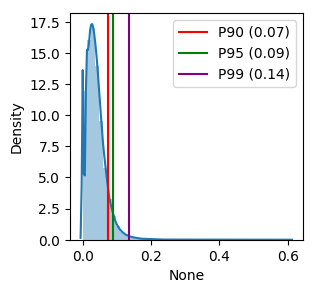

In [37]:
plt.figure(figsize=(3,3),dpi=100)
sns.distplot(jc_similarities)

colors = ['red','green','purple']
for pc, col in zip([90,95,99],colors):
    plt.axvline(np.percentile(jc_similarities, pc), label='P%i (%.2f)'%(pc,np.percentile(jc_similarities, pc)),
               color=col)
plt.legend()

In [50]:
np.percentile(jc_similarities, 90)

0.07272727272727275

In [51]:
#--Defining parameters for triplets
proportion = 0.05
n_neigh = int(df2.shape[0]*proportion)
min_jc =  0.05
high_jc = np.percentile(jc_similarities, 99)

N_triplets = 1000000
N_hard = 0.3
N_soft = 1-N_hard
#proporiton_uneffective = 0.25

n_trip = int(np.round(1000000*N_soft/df2.shape[0]))
n_hard_trip = int(np.round(1000000*N_hard/df2.shape[0]))
#n_trip_uneffective = int(np.round(n_trip*proporiton_uneffective))
#n_trip = int(n_trip - n_trip_uneffective)

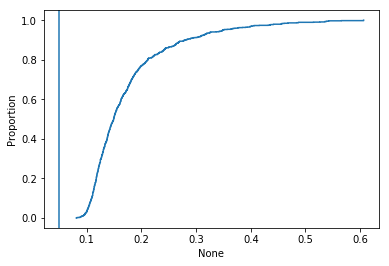

In [59]:
sns.ecdfplot(df2.max())
plt.axvline(0.05)

In [52]:
dgs = np.array(df2.columns)
triplets = []
hard_triplets = {0:[],1:[],2:[]}
for ix,dg in tqdm(enumerate(df2.index.values), total=df2.shape[0]):
    _triplets = []
    _hard_triplets = {0:[],1:[],2:[]}
    
    #--Getting jaccard similarity  vector
    v = np.array(df2.iloc[ix])
    v[ix] = np.nan #masking itself
  
    #--Getting pos
    ixs = np.where(v >= high_jc)[0]
    if len(ixs) < n_neigh:
        ixs = np.argsort(v)[::-1]
        ixs = ixs[v[ixs] >= min_jc]
        if len(ixs) == 0: continue
        cutoff = v[ixs][min([n_neigh-1, len(ixs)-1])]
        ixs = v >= cutoff
        
    neighs = dgs[ixs]
    similarities = v[ixs]
    probs = similarities / np.sum(similarities)
    
    #--Getting negs
    #negs = np.array(list(set(dgs)-set(neighs))) 
    negs = np.array(list(set(dgs)-set(neighs.tolist()+[dg])))
    
    #--Getting triplets
    
    #----Negs
    for _ in range(n_trip):
        _triplets.append([dg,np.random.choice(neighs,p=probs), np.random.choice(negs)])
    
    
    #for _ in range(n_trip_uneffective):
    #    _triplets.append([dg,np.random.choice(neighs,p=probs), np.random.choice(uneffective)])
  
    #  for i, neg in enumerate(negs):
  #      if i-norm == len(neighs):
  #          norm+=len(neighs)
  #      pos = neighs[i-norm]
 # 
 #       _triplets.append([dg,pos,neg])
  
    triplets.extend(_triplets)
    
    #--Adding hard triplets
    scores = np.unique(similarities)
    cutoffs = np.unique([np.percentile(scores,pc) for pc in [0,25,50,75,100]]) #unique and sort
    labels = np.arange(len(cutoffs))[:-1]
    groups = np.array(pd.cut(similarities, cutoffs, labels=labels))
    labels = [x for x in labels if x in groups]

    if len(labels) > 1:
        n_subhard = int(np.ceil(n_hard_trip/(len(labels)-1)))

        hard_positives = neighs[groups == labels[-1]]
        hard_probs = similarities[groups == labels[-1]]
        hard_probs = hard_probs/np.sum(hard_probs)

        for i in range(len(labels)-1):
            hard_negatives =  neighs[groups == labels[i]]
            assert len(set(hard_negatives) & set(hard_positives)) == 0
            for _ in range(n_subhard):
                _hard_triplets[labels[i]].append([dg,np.random.choice(hard_positives, p=hard_probs), np.random.choice(hard_negatives)])
        
    hard_triplets[0].extend(_hard_triplets[0])
    hard_triplets[1].extend(_hard_triplets[1])
    hard_triplets[2].extend(_hard_triplets[2])
    
    
    #labels = [labels[0],labels[-1]] # Skiping Q2 and Q3, so the hard negative are Q1 and hard positives are Q4
    #for i in range(len(labels)-1):
    #    g1 = labels[i]
    #    g2 = labels[i+1]
    #    dg1 = dgs[ixs][groups==g1]
    #    dg2 = dgs[ixs][groups==g2]
    #    for hard_neg in dg1:
    #        for hard_pos in dg2:
    #            _hard_triplets.append([dg, hard_pos, hard_neg])
                

    #n_hard = int(len(_triplets)*proportion_hard_triplets)
    #hard_triplets.extend(np.random.permutation(_hard_triplets)[:n_hard])
    #hard_triplets.extend(np.rando,


  0%|          | 0/1047 [00:00<?, ?it/s]

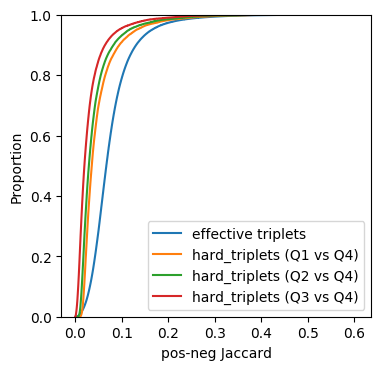

In [67]:
k = df2.melt(ignore_index=False).reset_index().values
pair2score = dict(zip(zip(k[:,0],k[:,1]), k[:,2]))

plt.figure(figsize=(4,4),dpi=100)

#--triplets
v = []
#v2 = []
for x in triplets:
    pos =  x[0],x[1]
    neg = x[0],x[2]
    if pos in pair2score:
        pos  = pair2score[pos]
    else:
        sys.exit()
        
    if neg in pair2score:
        neg = pair2score[neg]
        v.append(pos-neg)
    else:
        sys.exit()
        #neg = 0  
        #v2.append(pos-neg)
        
sns.ecdfplot(v, label='effective triplets')
#sns.ecdfplot(v2, label='uneffective triplets')

#--hard triplets
for g in hard_triplets:
    
    v2 = []
    for x in hard_triplets[g]:
        pos =  x[0],x[1]
        neg = x[0],x[2]
        if pos in pair2score:
            pos  = pair2score[pos]
        else:
            sys.exit()

        if neg in pair2score:
            neg = pair2score[neg]
        else:
            sys.exit()

        v2.append(pos-neg)
    
    sns.ecdfplot(v2, label='hard_triplets (Q%i vs Q4)'%(g+1))


plt.xlabel('pos-neg Jaccard')
plt.legend()
#plt.xlim(0,np.percentile(jc_similarities,99))

In [60]:
all_triplets = list(triplets)
for g in list(hard_triplets):
    all_triplets.extend(list(hard_triplets[g]))
all_triplets = np.array(all_triplets)

print('triplets: %i'%len(triplets))
_uneffective = set(uneffective)
easy = len([x for x in triplets if x[-1] in _uneffective])
print('\t--> effective: %i (%.2f)%%'%(len(triplets)-easy, (100*(len(triplets)-easy)/len(all_triplets))))
print('\t--> uneffective: %i (%.2f)%%'%(easy, 100*easy/len(all_triplets)))
total_hard = np.sum([len(hard_triplets[g]) for g in hard_triplets])
print('hard triplets: %i'%total_hard)
for g in hard_triplets:
    print('\t--> Q%i vs Q4: %i (%.2f)%%'%(g+1, len(hard_triplets[g]),100*len(hard_triplets[g])/len(all_triplets)))
print('all triplets: %i'%len(all_triplets))


triplets: 700443
	--> effective: 700443 (69.91)%
	--> uneffective: 0 (0.00)%
hard triplets: 301536
	--> Q1 vs Q4: 100512 (10.03)%
	--> Q2 vs Q4: 100512 (10.03)%
	--> Q3 vs Q4: 100512 (10.03)%
all triplets: 1001979


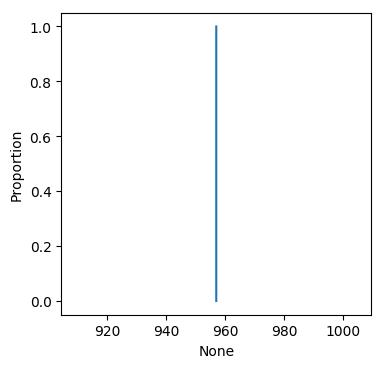

In [61]:
v = list(Counter(all_triplets[:,0]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

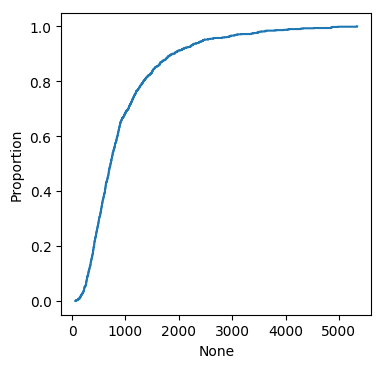

In [62]:
v = list(Counter(all_triplets[:,1]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

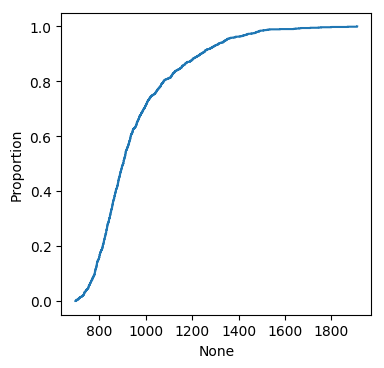

In [63]:
v = list(Counter(all_triplets[:,2]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

/home/nkurzawa/miniconda3/envs/sign/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/nkurzawa/miniconda3/envs/sign/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


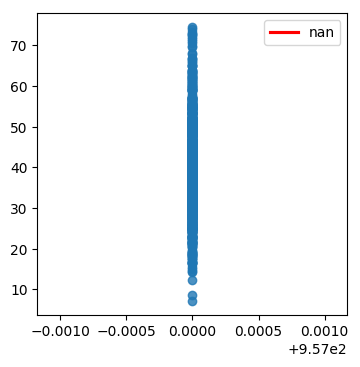

In [64]:
dg2sum = dict(df2.sum(1))
dg2count = dict(Counter(all_triplets[:,0]))

x,y = [],[]

for dg in dg2sum:
    x.append(dg2sum[dg])
    y.append(dg2count[dg])
    
plt.figure(figsize=(4,4),dpi=100)
sns.regplot(y,x, line_kws={'color':'red', 'label':'%.2f'%(pearsonr(y,x)[0])})
plt.legend()

In [65]:
#Writing
all_triplets = pd.DataFrame(all_triplets, columns=['anchor','pos','neg']).sort_values(['anchor','pos','neg']).reset_index(drop=True)
all_triplets.to_csv('./m2_train_triplets.tsv.gz', sep='\t', index=False, compression='gzip')

In [66]:
all_triplets

,anchor,pos,neg
0,AAFNEINEQRQMTF-LREBCSMRSA-N,ACGDKVXYNVEAGU-UHFFFAOYSA-N,FIVHOHCAXWQPGC-UHFFFAOYSA-N
1,AAFNEINEQRQMTF-LREBCSMRSA-N,ACGDKVXYNVEAGU-UHFFFAOYSA-N,GPTONYMQFTZPKC-UHFFFAOYSA-N
2,AAFNEINEQRQMTF-LREBCSMRSA-N,ACGDKVXYNVEAGU-UHFFFAOYSA-N,HAPOVYFOVVWLRS-UHFFFAOYSA-N
3,AAFNEINEQRQMTF-LREBCSMRSA-N,ACGDKVXYNVEAGU-UHFFFAOYSA-N,MGCCHNLNRBULBU-WZTVWXICSA-N
4,AAFNEINEQRQMTF-LREBCSMRSA-N,ACGDKVXYNVEAGU-UHFFFAOYSA-N,NLVFBUXFDBBNBW-PBSUHMDJSA-N
...,...,...,...
1001974,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZOCUOMKMBMEYQV-GSLJADNHSA-N,NWPRCRWQMGIBOT-UHFFFAOYSA-N
1001975,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZOCUOMKMBMEYQV-GSLJADNHSA-N,OLBCVFGFOZPWHH-UHFFFAOYSA-N
1001976,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZOCUOMKMBMEYQV-GSLJADNHSA-N,VYMDGNCVAMGZFE-UHFFFAOYSA-N
1001977,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,ZOCUOMKMBMEYQV-GSLJADNHSA-N,YRWLZFXJFBZBEY-UHFFFAOYSA-N


## Try making triplets based on PCA

In [3]:
from sklearn.decomposition import PCA
#--Reading
df = pd.read_csv('../data/M2_train_split.csv', index_col=0)

In [4]:
pca = PCA(n_components=100)
pca_red = pca.fit_transform(df.to_numpy())
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.06972963 0.06134649 0.02616172 0.02205509 0.01741199 0.01555021
 0.01299659 0.01290356 0.01066724 0.00997375 0.0088707  0.00847736
 0.00781847 0.00717473 0.00669017 0.00664484 0.00647468 0.00621949
 0.00597503 0.00584314 0.00580906 0.00554142 0.00539324 0.00521027
 0.00507383 0.00500798 0.00489783 0.00485366 0.00470235 0.00463421
 0.00457095 0.00446452 0.00441537 0.00424744 0.00417781 0.00415135
 0.00410169 0.00401813 0.00391205 0.00387661 0.00378515 0.0037356
 0.00367822 0.00363688 0.00356092 0.00353322 0.00347919 0.00342438
 0.00337141 0.00333924 0.00330882 0.0032986  0.00328143 0.00320076
 0.00311763 0.00308501 0.00306245 0.00302924 0.00300393 0.00298156
 0.0029473  0.00291547 0.00289081 0.00284396 0.00283932 0.00280158
 0.00277382 0.00275177 0.00271322 0.00269508 0.00266199 0.00262972
 0.00260241 0.00256441 0.00255512 0.00249997 0.00249232 0.00249083
 0.00247467 0.00242703 0.00242188 0.00239673 0.0023663  0.0023416
 0.00230924 0.00229677 0.00227932 0.00226096 0.00223361 0.002228

In [5]:
pca_red.shape

(1047, 100)

In [6]:
pca_df = pd.DataFrame(pca_red, index=df.index)

In [7]:
v = pca_df.values.ravel()

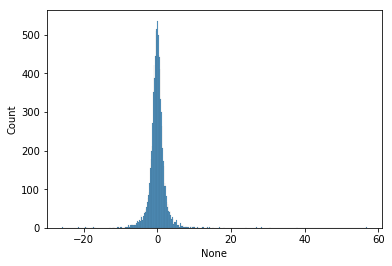

In [8]:
sns.histplot(np.random.choice(v, 10000))

In [9]:
np.percentile(v, 90)

1.994154190777522

In [10]:
pca_df = pd.DataFrame(pca_red, index=df.index)

#--Trasforming
cutoff = np.percentile(v, 90)
pca_df = pca_df > cutoff
pca_df_neg = pca_df < -cutoff

pca_df = pd.merge(pca_df, pca_df_neg, left_index=True, right_index=True)

uneffective = pca_df.index.values[np.array(pca_df.sum(1) == 0)]
pca_df = pca_df.iloc[np.array(pca_df.sum(1) > 0)]

print('# uneffective: %i'%len(uneffective))
print('# effective: %i'%len(df))

# uneffective: 45
# effective: 1047


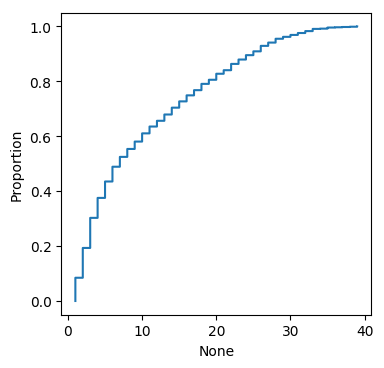

In [18]:
plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(pca_df.sum(1))

In [11]:
#--Getting similarities
jc_similarities = 1- pdist(pca_df, 'jaccard')
df2 = pd.DataFrame(squareform(jc_similarities), index= pca_df.index.values, columns=pca_df.index.values)

In [20]:
df2

,MTKNGOHFNXIVOS-UHFFFAOYSA-N,WHBIGIKBNXZKFE-UHFFFAOYSA-N,OYFJQPXVCSSHAI-BMSLDGIRSA-N,YWKRLOSRDGPEJR-KIUKIJHYSA-N,GKEGFOKQMZHVOW-UHFFFAOYSA-M,YPDVTKJXVHYWFY-UHFFFAOYSA-N,XJGFWWJLMVZSIG-UHFFFAOYSA-N,VPSRQEHTHIMDQM-FKLPMGAJSA-N,QUQPHWDTPGMPEX-QJBIFVCTSA-N,PUFQVTATUTYEAL-UHFFFAOYSA-N,...,ANOMHKZSQFYSBR-UHFFFAOYSA-N,WAOQONBSWFLFPE-SECBINFHSA-N,KVWNWTZZBKCOPM-UHFFFAOYSA-M,GUGOEEXESWIERI-UHFFFAOYSA-N,QTFFGPOXNNGTGZ-RCSCTSIBSA-N,HCRKCZRJWPKOAR-JTQLQIEISA-N,MVWVFYHBGMAFLY-UHFFFAOYSA-N,FEBLZLNTKCEFIT-VSXGLTOVSA-N,OMCOKCNIYWULQH-UHFFFAOYSA-N,RRJFVPUCXDGFJB-UHFFFAOYSA-N
MTKNGOHFNXIVOS-UHFFFAOYSA-N,0.00,0.000000,0.000000,0.2000,0.000000,0.142857,0.000000,0.000000,0.071429,0.166667,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
WHBIGIKBNXZKFE-UHFFFAOYSA-N,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.071429,0.057143,0.000000,0.111111,...,0.000000,0.000000,0.090909,0.000000,0.125000,0.000000,0.000000,0.107143,0.000000,0.041667
OYFJQPXVCSSHAI-BMSLDGIRSA-N,0.00,0.000000,0.000000,0.0625,0.066667,0.055556,0.151515,0.071429,0.040000,0.000000,...,0.133333,0.129032,0.052632,0.125000,0.062500,0.090909,0.000000,0.054054,0.000000,0.137931
YWKRLOSRDGPEJR-KIUKIJHYSA-N,0.20,0.000000,0.062500,0.0000,0.050000,0.142857,0.000000,0.062500,0.000000,0.166667,...,0.200000,0.043478,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GKEGFOKQMZHVOW-UHFFFAOYSA-M,0.00,0.000000,0.066667,0.0500,0.000000,0.045455,0.135135,0.139535,0.034483,0.000000,...,0.050000,0.054054,0.000000,0.047619,0.050000,0.176471,0.000000,0.228571,0.050000,0.193548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCRKCZRJWPKOAR-JTQLQIEISA-N,0.00,0.000000,0.090909,0.0000,0.176471,0.038462,0.210526,0.127660,0.133333,0.040000,...,0.041667,0.075000,0.037037,0.000000,0.086957,0.000000,0.000000,0.205128,0.041667,0.108108
MVWVFYHBGMAFLY-UHFFFAOYSA-N,0.25,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.250000,0.000000
FEBLZLNTKCEFIT-VSXGLTOVSA-N,0.00,0.107143,0.054054,0.0000,0.228571,0.034483,0.113636,0.244444,0.000000,0.035714,...,0.000000,0.095238,0.000000,0.000000,0.076923,0.205128,0.038462,0.000000,0.120000,0.157895
OMCOKCNIYWULQH-UHFFFAOYSA-N,0.00,0.000000,0.000000,0.0000,0.050000,0.000000,0.000000,0.030303,0.000000,0.000000,...,0.000000,0.043478,0.000000,0.000000,0.000000,0.041667,0.250000,0.120000,0.000000,0.047619


/home/nkurzawa/miniconda3/envs/sign/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


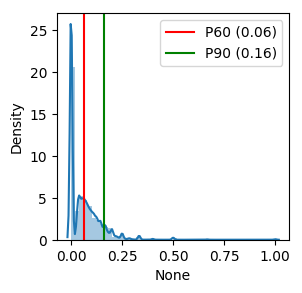

In [18]:
plt.figure(figsize=(3,3),dpi=100)
sns.distplot(jc_similarities)

colors = ['red','green']
for pc, col in zip([60, 90,95,99],colors):
    plt.axvline(np.percentile(jc_similarities, pc), label='P%i (%.2f)'%(pc,np.percentile(jc_similarities, pc)),
               color=col)
plt.legend()

In [13]:
#--Defining parameters for triplets
proportion = 0.05
n_neigh = int(df2.shape[0]*proportion)
min_jc =  np.percentile(jc_similarities, 60)
high_jc = np.percentile(jc_similarities, 95)

N_triplets = 1000000
N_hard = 0.3
N_soft = 1-N_hard
#proporiton_uneffective = 0.25

n_trip = int(np.round(1000000*N_soft/df2.shape[0]))
n_hard_trip = int(np.round(1000000*N_hard/df2.shape[0]))
#n_trip_uneffective = int(np.round(n_trip*proporiton_uneffective))
#n_trip = int(n_trip - n_trip_uneffective)

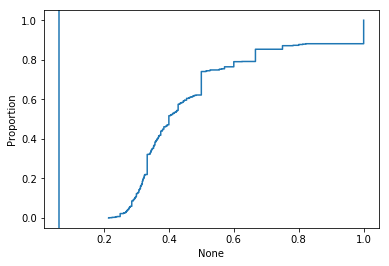

In [14]:
sns.ecdfplot(df2.max())
plt.axvline(np.percentile(jc_similarities, 60))

In [15]:
dgs = np.array(df2.columns)
triplets = []
hard_triplets = {0:[],1:[],2:[]}
for ix,dg in tqdm(enumerate(df2.index.values), total=df2.shape[0]):
    _triplets = []
    _hard_triplets = {0:[],1:[],2:[]}
    
    #--Getting jaccard similarity  vector
    v = np.array(df2.iloc[ix])
    v[ix] = np.nan #masking itself
  
    #--Getting pos
    ixs = np.where(v >= high_jc)[0]
    if len(ixs) < n_neigh:
        ixs = np.argsort(v)[::-1]
        ixs = ixs[v[ixs] >= min_jc]
        if len(ixs) == 0: continue
        cutoff = v[ixs][min([n_neigh-1, len(ixs)-1])]
        ixs = v >= cutoff
        
    neighs = dgs[ixs]
    similarities = v[ixs]
    probs = similarities / np.sum(similarities)
    
    #--Getting negs
    #negs = np.array(list(set(dgs)-set(neighs))) 
    negs = np.array(list(set(dgs)-set(neighs.tolist()+[dg])))
    
    #--Getting triplets
    
    #----Negs
    for _ in range(n_trip):
        _triplets.append([dg,np.random.choice(neighs,p=probs), np.random.choice(negs)])
    
    
    #for _ in range(n_trip_uneffective):
    #    _triplets.append([dg,np.random.choice(neighs,p=probs), np.random.choice(uneffective)])
  
    #  for i, neg in enumerate(negs):
  #      if i-norm == len(neighs):
  #          norm+=len(neighs)
  #      pos = neighs[i-norm]
 # 
 #       _triplets.append([dg,pos,neg])
  
    triplets.extend(_triplets)
    
    #--Adding hard triplets
    scores = np.unique(similarities)
    cutoffs = np.unique([np.percentile(scores,pc) for pc in [0,25,50,75,100]]) #unique and sort
    labels = np.arange(len(cutoffs))[:-1]
    groups = np.array(pd.cut(similarities, cutoffs, labels=labels))
    labels = [x for x in labels if x in groups]

    if len(labels) > 1:
        n_subhard = int(np.ceil(n_hard_trip/(len(labels)-1)))

        hard_positives = neighs[groups == labels[-1]]
        hard_probs = similarities[groups == labels[-1]]
        hard_probs = hard_probs/np.sum(hard_probs)

        for i in range(len(labels)-1):
            hard_negatives =  neighs[groups == labels[i]]
            assert len(set(hard_negatives) & set(hard_positives)) == 0
            for _ in range(n_subhard):
                _hard_triplets[labels[i]].append([dg,np.random.choice(hard_positives, p=hard_probs), np.random.choice(hard_negatives)])
        
    hard_triplets[0].extend(_hard_triplets[0])
    hard_triplets[1].extend(_hard_triplets[1])
    hard_triplets[2].extend(_hard_triplets[2])
    
    
    #labels = [labels[0],labels[-1]] # Skiping Q2 and Q3, so the hard negative are Q1 and hard positives are Q4
    #for i in range(len(labels)-1):
    #    g1 = labels[i]
    #    g2 = labels[i+1]
    #    dg1 = dgs[ixs][groups==g1]
    #    dg2 = dgs[ixs][groups==g2]
    #    for hard_neg in dg1:
    #        for hard_pos in dg2:
    #            _hard_triplets.append([dg, hard_pos, hard_neg])
                

    #n_hard = int(len(_triplets)*proportion_hard_triplets)
    #hard_triplets.extend(np.random.permutation(_hard_triplets)[:n_hard])
    #hard_triplets.extend(np.rando,


  0%|          | 0/1002 [00:00<?, ?it/s]

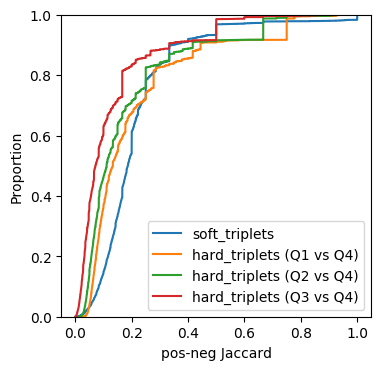

In [16]:
k = df2.melt(ignore_index=False).reset_index().values
pair2score = dict(zip(zip(k[:,0],k[:,1]), k[:,2]))

plt.figure(figsize=(4,4),dpi=100)

#--triplets
v = []
#v2 = []
for x in triplets:
    pos =  x[0],x[1]
    neg = x[0],x[2]
    if pos in pair2score:
        pos  = pair2score[pos]
    else:
        sys.exit()
        
    if neg in pair2score:
        neg = pair2score[neg]
        v.append(pos-neg)
    else:
        sys.exit()
        #neg = 0  
        #v2.append(pos-neg)
        
sns.ecdfplot(v, label='soft_triplets')
#sns.ecdfplot(v2, label='uneffective triplets')

#--hard triplets
for g in hard_triplets:
    
    v2 = []
    for x in hard_triplets[g]:
        pos =  x[0],x[1]
        neg = x[0],x[2]
        if pos in pair2score:
            pos  = pair2score[pos]
        else:
            sys.exit()

        if neg in pair2score:
            neg = pair2score[neg]
        else:
            sys.exit()

        v2.append(pos-neg)
    
    sns.ecdfplot(v2, label='hard_triplets (Q%i vs Q4)'%(g+1))


plt.xlabel('pos-neg Jaccard')
plt.legend()
#plt.xlim(0,np.percentile(jc_similarities,99))

In [26]:
all_triplets = list(triplets)
for g in list(hard_triplets):
    all_triplets.extend(list(hard_triplets[g]))
all_triplets = np.array(all_triplets)

print('triplets: %i'%len(triplets))
_uneffective = set(uneffective)
easy = len([x for x in triplets if x[-1] in _uneffective])
print('\t--> effective: %i (%.2f)%%'%(len(triplets)-easy, (100*(len(triplets)-easy)/len(all_triplets))))
print('\t--> uneffective: %i (%.2f)%%'%(easy, 100*easy/len(all_triplets)))
total_hard = np.sum([len(hard_triplets[g]) for g in hard_triplets])
print('hard triplets: %i'%total_hard)
for g in hard_triplets:
    print('\t--> Q%i vs Q4: %i (%.2f)%%'%(g+1, len(hard_triplets[g]),100*len(hard_triplets[g])/len(all_triplets)))
print('all triplets: %i'%len(all_triplets))


triplets: 699788
	--> effective: 699788 (69.91)%
	--> uneffective: 0 (0.00)%
hard triplets: 301199
	--> Q1 vs Q4: 99500 (9.94)%
	--> Q2 vs Q4: 100999 (10.09)%
	--> Q3 vs Q4: 100700 (10.06)%
all triplets: 1000987


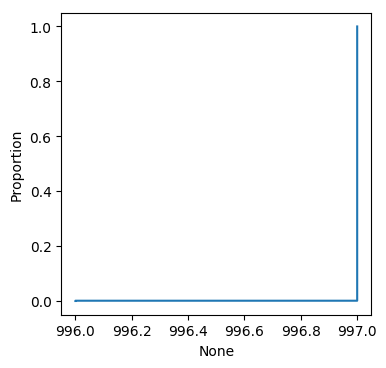

In [27]:
v = list(Counter(all_triplets[:,0]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

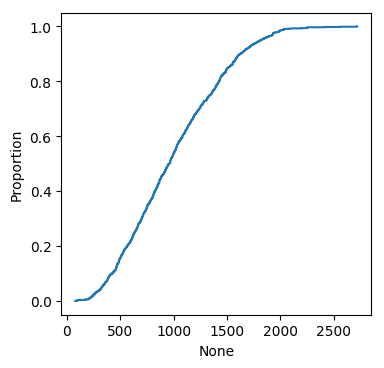

In [28]:
v = list(Counter(all_triplets[:,1]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

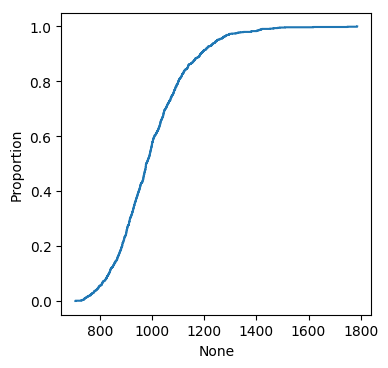

In [29]:
v = list(Counter(all_triplets[:,2]).values())

plt.figure(figsize=(4,4),dpi=100)
sns.ecdfplot(v)

In [30]:
#Writing
all_triplets = pd.DataFrame(all_triplets, columns=['anchor','pos','neg']).sort_values(['anchor','pos','neg']).reset_index(drop=True)
all_triplets.to_csv('./m2_train_pca_triplets.tsv.gz', sep='\t', index=False, compression='gzip')

In [31]:
all_triplets

,anchor,pos,neg
0,AAFNEINEQRQMTF-LREBCSMRSA-N,AKJDEXBCRLOVTH-UHFFFAOYSA-N,FIKFLLIUPUVONI-UHFFFAOYSA-N
1,AAFNEINEQRQMTF-LREBCSMRSA-N,AKJDEXBCRLOVTH-UHFFFAOYSA-N,GLVAUDGFNGKCSF-UHFFFAOYSA-N
2,AAFNEINEQRQMTF-LREBCSMRSA-N,AKJDEXBCRLOVTH-UHFFFAOYSA-N,HSMPDPBYAYSOBC-UHFFFAOYSA-N
3,AAFNEINEQRQMTF-LREBCSMRSA-N,AKJDEXBCRLOVTH-UHFFFAOYSA-N,IPEHBUMCGVEMRF-UHFFFAOYSA-N
4,AAFNEINEQRQMTF-LREBCSMRSA-N,AKJDEXBCRLOVTH-UHFFFAOYSA-N,JOHZPMXAZQZXHR-UHFFFAOYSA-N
...,...,...,...
1000982,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,XPEJRQSXLRKGBZ-UHFFFAOYSA-N,VPSRQEHTHIMDQM-FKLPMGAJSA-N
1000983,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,XPEJRQSXLRKGBZ-UHFFFAOYSA-N,WTJXVDPDEQKTCV-VQAITOIOSA-N
1000984,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,XPEJRQSXLRKGBZ-UHFFFAOYSA-N,WVNOAGNOIPTWPT-XWASNXTISA-N
1000985,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,XPEJRQSXLRKGBZ-UHFFFAOYSA-N,XKLMZUWKNUAPSZ-UHFFFAOYSA-N
